# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #239B56; text-align: center; line-height: 1.25;"><b>Hypothyroid<span style="color: #000000"> EDA & Prediction</span></b><br><span style="color: #145A32; font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>
​

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239B56; text-align: center; line-height: 1.25;">Columns Description</h1>
<hr>

<ol start="1">
  <li>age - age of the patient (int)</li>
  <li>sex - sex patient identifies (str)</li>
  <li>on_thyroxine - whether patient is on thyroxine (bool)</li>
  <li>query on thyroxine - *whether patient is on thyroxine (bool)</li>
  <li>on antithyroid meds - whether patient is on antithyroid meds (bool)</li>
  <li>sick - whether patient is sick (bool)</li>
  <li>pregnant - whether patient is pregnant (bool)</li>
  <li>thyroid_surgery - whether patient has undergone thyroid surgery (bool)</li>
  <li>I131_treatment - whether patient is undergoing I131 treatment (bool)</li>
  <li>query_hypothyroid - whether patient believes they have hypothyroid (bool)</li>
  <li>query_hyperthyroid - whether patient believes they have hyperthyroid (bool)</li>
  <li>lithium - whether patient * lithium (bool)</li>
  <li>goitre - whether patient has goitre (bool)</li>
  <li>tumor - whether patient has tumor (bool)</li>
  <li>hypopituitary - whether patient * hyperpituitary gland (float)</li>
  <li>psych - whether patient * psych (bool)</li>
  <li>TSH_measured - whether TSH was measured in the blood (bool)</li>
  <li>TSH - TSH level in blood from lab work (float)</li>
  <li>T3_measured - whether T3 was measured in the blood (bool)</li>
  <li>T3 - T3 level in blood from lab work (float)</li>
  <li>TT4_measured - whether TT4 was measured in the blood (bool)</li>
  <li>TT4 - TT4 level in blood from lab work (float)</li>
  <li>T4U_measured - whether T4U was measured in the blood (bool)</li>
  <li>T4U - T4U level in blood from lab work (float)</li>
  <li>FTI_measured - whether FTI was measured in the blood (bool)</li>
  <li>FTI - FTI level in blood from lab work (float)</li>
  <li>TBG_measured - whether TBG was measured in the blood (bool)</li>
  <li>TBG - TBG level in blood from lab work (float)</li>
  <li>referral_source - (str)</li>
  <li>target - hyperthyroidism medical diagnosis (str)</li>
  <li>patient_id - unique id of the patient (str)</li>
</ol>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Import Essential Libraries</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Load Dataset</h1>
<hr>

In [2]:
hypothyroid_dataset = pd.read_csv("thyroidDF.csv")

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Showing Dataset</h1>
<hr>

In [3]:
hypothyroid_dataset.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
hypothyroid_dataset.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027
9171,31,M,f,f,f,f,f,f,f,t,...,66.0,t,1.02,t,65.0,f,NaN,other,-,870119035


In [5]:
hypothyroid_dataset.sample(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
8727,13,F,f,f,f,f,f,f,f,f,...,102.0,t,0.80,t,128.0,f,NaN,other,-,861204003
8061,22,F,f,f,f,f,f,f,f,f,...,134.0,t,0.97,t,138.0,f,NaN,other,-,861009065
8086,38,F,f,f,f,f,f,f,f,f,...,221.0,t,1.09,t,203.0,f,NaN,other,A,861013008
2266,73,F,f,f,f,f,f,f,f,f,...,113.0,t,0.89,t,127.0,f,NaN,SVI,K,850403052
2518,51,M,f,f,f,f,f,f,f,f,...,113.0,t,0.84,t,134.0,f,NaN,SVI,-,850429007


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Drop Unnecessary Columns</h1>
<hr>

In [6]:
hypothyroid_dataset.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Info of Dataset</h1>
<hr>

In [7]:
# mapping vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

# re-mapping
hypothyroid_dataset['target'] = hypothyroid_dataset['target'].map(diagnoses) 

# dropping observations of target null
hypothyroid_dataset.dropna(subset=['target'], inplace=True) 

hypothyroid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Statistical Description Dataset</h1>
<hr>

In [8]:
hypothyroid_dataset.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Observation of Age more than 100</h1>
<hr>

In [9]:
hypothyroid_dataset[hypothyroid_dataset.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [10]:
# changing ('age' > 100) to null
hypothyroid_dataset['age'] = np.where((hypothyroid_dataset.age > 100), np.nan, hypothyroid_dataset.age)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Handle missing values and null values</h1>
<hr>

In [11]:
missingness = hypothyroid_dataset.isnull().sum().sum() / hypothyroid_dataset.count().sum()
print('Overall Missingness is: {:.2f}%'.format(missingness * 100))

def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_table(hypothyroid_dataset).head(10)

Overall Missingness is: 7.54%


,Total,Percent
TBG,7287,0.965677
T3,2209,0.292738
TSH,722,0.095680
T4U,676,0.089584
FTI,669,0.088656
TT4,354,0.046912
sex,250,0.033130
age,4,0.000530
goitre,0,0.000000
psych,0,0.000000


In [12]:
# dropping 'TBG'
hypothyroid_dataset.drop(['TBG'], axis=1, inplace=True)

# dropping 4 observations with abnormal 'age'
hypothyroid_dataset.dropna(subset=['age'], inplace=True)

# changing sex of observations with Female
hypothyroid_dataset['sex'] = np.where((hypothyroid_dataset.sex.isnull()) & (hypothyroid_dataset.pregnant == 't'), 'F', hypothyroid_dataset.sex)

In [13]:
# count missing values
hypothyroid_dataset['n_missing'] = hypothyroid_dataset.isnull().sum(axis=1)

In [14]:
# calculating missing values
missingness = hypothyroid_dataset.isnull().sum().sum() / hypothyroid_dataset.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# remove rows with 3 or more missing values
hypothyroid_dataset.drop(hypothyroid_dataset.index[hypothyroid_dataset['n_missing'] > 2], inplace=True)
print
missing_table(hypothyroid_dataset).head(10)

Overall Missingness of thyroidDF is: 2.89%


,Total,Percent
T3,1910,0.267432
TSH,406,0.056847
T4U,290,0.040605
FTI,283,0.039625
sex,208,0.029123
TT4,6,0.000840
age,0,0.000000
goitre,0,0.000000
target,0,0.000000
psych,0,0.000000


In [15]:
# dropping 'n_missing'
hypothyroid_dataset.drop(['n_missing'], axis=1, inplace=True)
hypothyroid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7142 entries, 1 to 9171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7142 non-null   float64
 1   sex                  6934 non-null   object 
 2   on_thyroxine         7142 non-null   object 
 3   query_on_thyroxine   7142 non-null   object 
 4   on_antithyroid_meds  7142 non-null   object 
 5   sick                 7142 non-null   object 
 6   pregnant             7142 non-null   object 
 7   thyroid_surgery      7142 non-null   object 
 8   I131_treatment       7142 non-null   object 
 9   query_hypothyroid    7142 non-null   object 
 10  query_hyperthyroid   7142 non-null   object 
 11  lithium              7142 non-null   object 
 12  goitre               7142 non-null   object 
 13  tumor                7142 non-null   object 
 14  hypopituitary        7142 non-null   object 
 15  psych                7142 non-null   o

In [16]:
# Fill null value to previous one with method = 'pad' and replace NaN to 0

hypothyroid_dataset.fillna(method ='pad', inplace=True)
hypothyroid_dataset.replace(np.nan, 0, inplace=True)

In [17]:
hypothyroid_dataset.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">EDA: Plots</h1>
<hr>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Plot: TT4 vs Age</h1>
<hr>

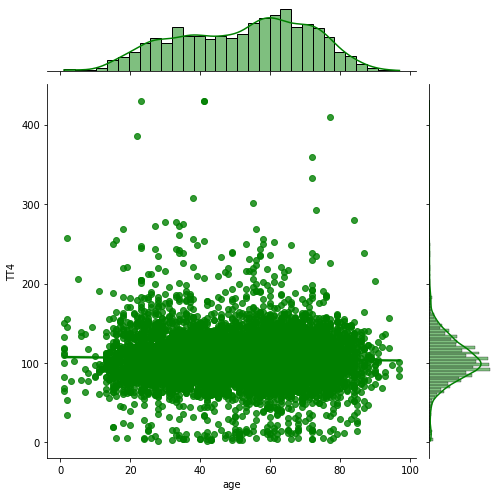

In [18]:
sns.jointplot(x='age', y='TT4', data=hypothyroid_dataset, kind='reg', height=7, ratio=5, color='g')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Plot: T3 vs Age</h1>
<hr>

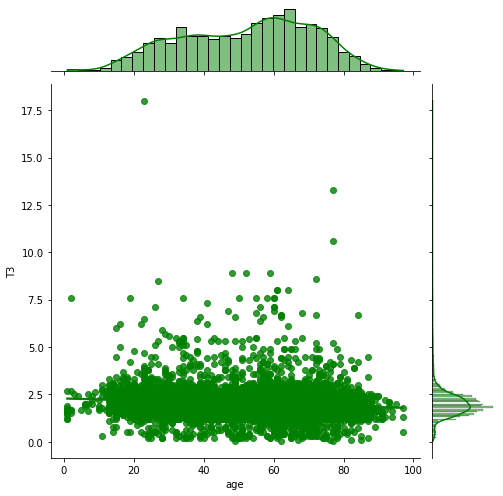

In [19]:
sns.jointplot(x='age', y='T3', data=hypothyroid_dataset, kind='reg', height=7, ratio=5, color='g')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Plot: T4U vs Age</h1>
<hr>

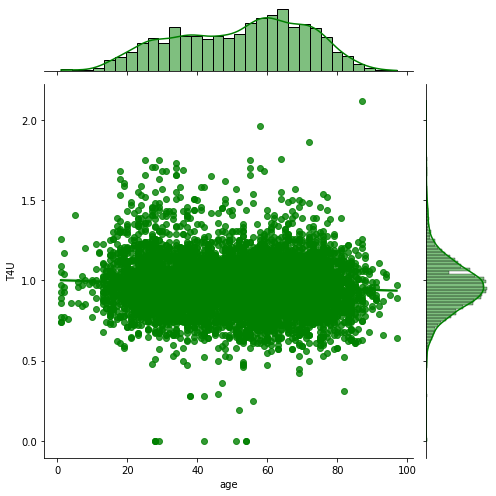

In [20]:
sns.jointplot(x='age', y='T4U', data=hypothyroid_dataset, kind='reg', height=7, ratio=5, color='g')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Plot: FTI vs Age</h1>
<hr>

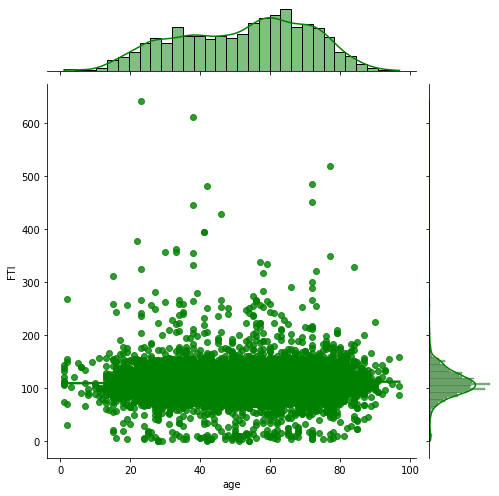

In [21]:
sns.jointplot(x='age', y='FTI', data=hypothyroid_dataset, kind='reg', height=7, ratio=5, color='g')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Plot: TSH vs Age</h1>
<hr>

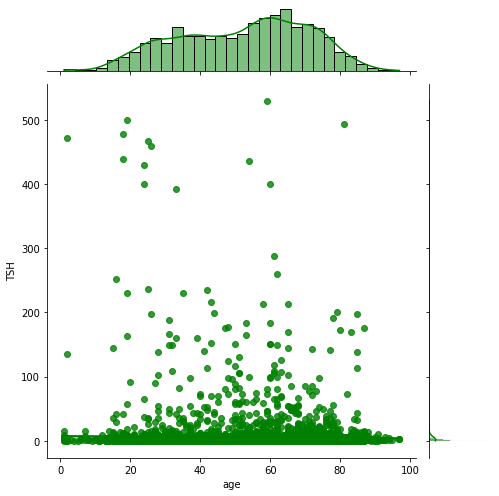

In [22]:
sns.jointplot(x='age', y='TSH', data=hypothyroid_dataset, kind='reg', height=7, ratio=5, color='g')

Text(0, 0.5, 'FTI')

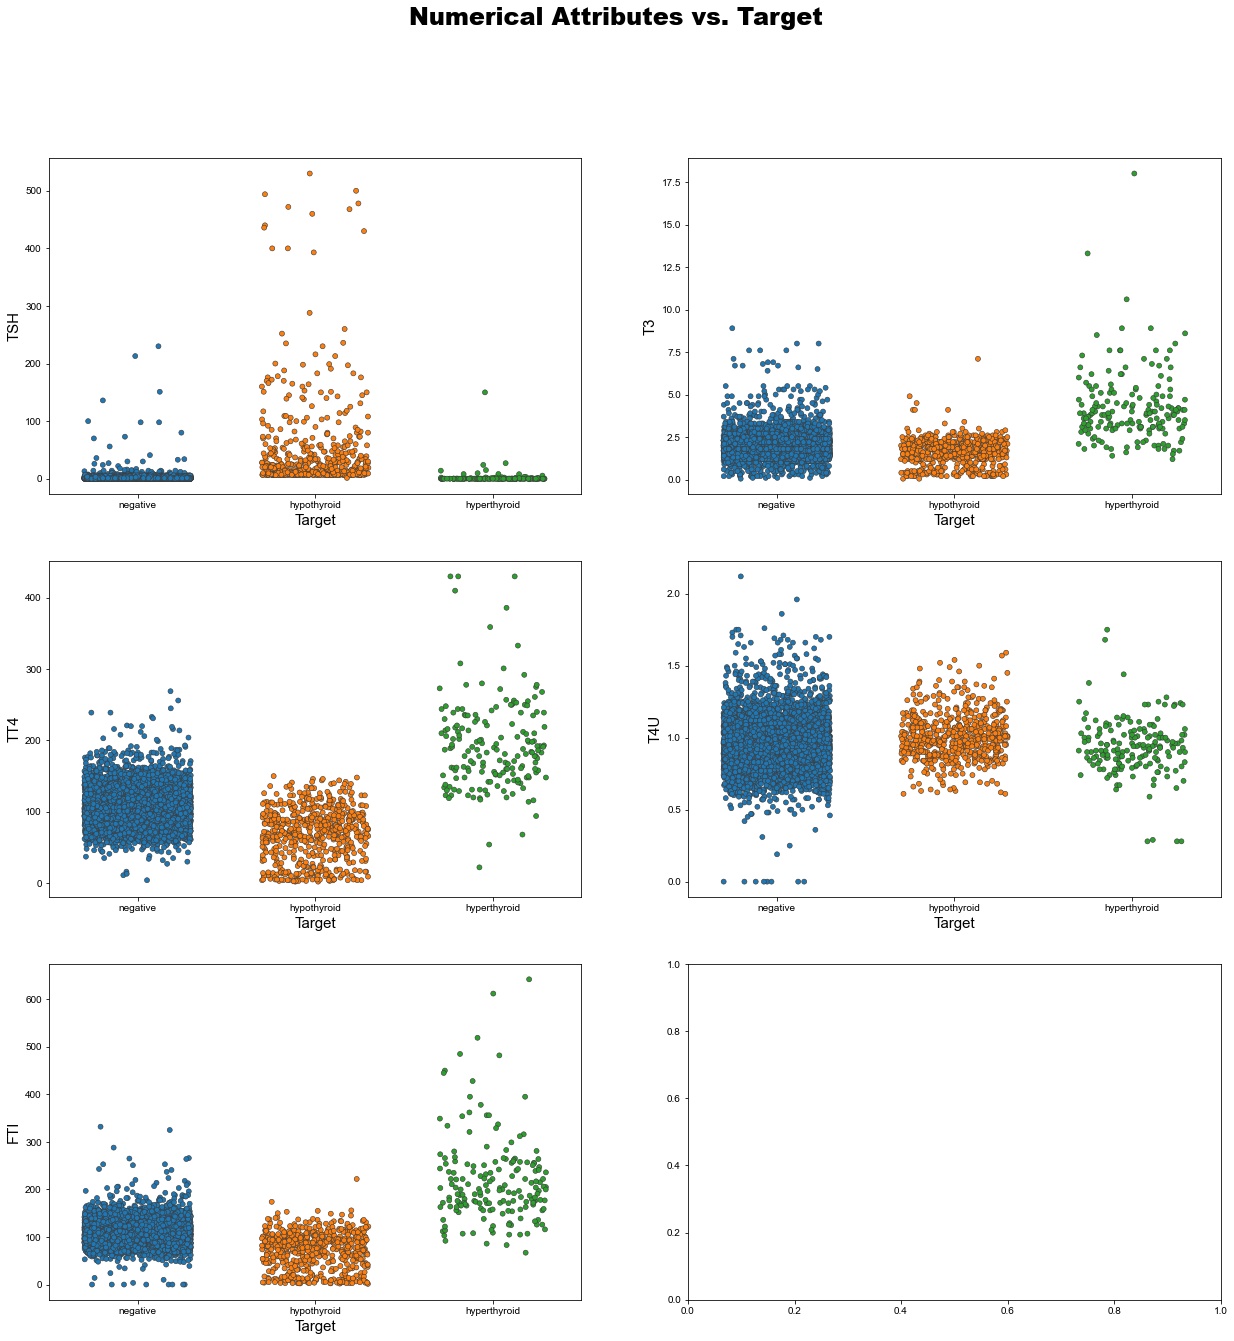

In [23]:
# setting up grid for multiple seaborn plots
colors = ['#154360','#1F618D','#2980B9']
fig, axes = plt.subplots(3,2,figsize=(21,21))
fig.suptitle('Numerical Attributes vs. Target', fontweight='heavy', fontsize=24, 
             fontfamily='sans-serif')
sns.set_style('whitegrid');

# TSH
tsh = sns.stripplot(x=hypothyroid_dataset.target, y=hypothyroid_dataset.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
tsh.set_xlabel('Target',fontsize='15')
tsh.set_ylabel('TSH',fontsize='15')

# T3
t3 = sns.stripplot(x=hypothyroid_dataset.target, y=hypothyroid_dataset.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
t3.set_xlabel('Target',fontsize='15')
t3.set_ylabel('T3',fontsize='15')

# TT4
tt4 = sns.stripplot(x=hypothyroid_dataset.target, y=hypothyroid_dataset.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
tt4.set_xlabel('Target',fontsize='15')
tt4.set_ylabel('TT4',fontsize='15')

# T4U
t4u = sns.stripplot(x=hypothyroid_dataset.target, y=hypothyroid_dataset.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
t4u.set_xlabel('Target',fontsize='15')
t4u.set_ylabel('T4U',fontsize='15')

# FTI
fti = sns.stripplot(x=hypothyroid_dataset.target, y=hypothyroid_dataset.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
fti.set_xlabel('Target',fontsize='15')
fti.set_ylabel('FTI',fontsize='15')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Correlation Matrix of Dataset</h1>
<hr>

<AxesSubplot:>

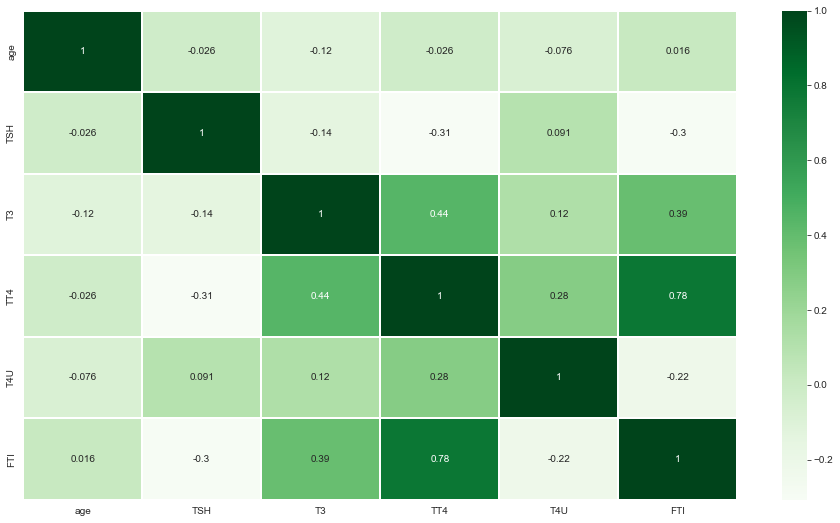

In [24]:
plt.figure(figsize=(16, 9))
sns.heatmap(hypothyroid_dataset.corr(), annot=True, cmap='Greens', linewidths=0.1)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Import ML Algorithms</h1>
<hr>

In [25]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Mapping values with binary numbers</h1>
<hr>

In [26]:
hypothyroid_dataset.replace('f', 0, inplace=True)
hypothyroid_dataset.replace('t', 1, inplace=True)

hypothyroid_dataset.replace('M', 0, inplace=True)
hypothyroid_dataset.replace('F', 1, inplace=True)

predDF = hypothyroid_dataset.replace(np.nan, 0)

diagnoses = {'negative': 0,
             'hypothyroid': 1, 
             'hyperthyroid': 2}

predDF['target'] = predDF['target'].map(diagnoses)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Separating Dataset for Training and Testing</h1>
<hr>

In [27]:
X = predDF.drop('target', axis=1).copy()
y = predDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Implementation of Machine Learning Models</h1>
<hr>

## <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Model: Decision Tree</h1>
<hr>

In [28]:
dec_model=DecisionTreeClassifier()
dec_model.fit(X_train,y_train)

y_pred = dec_model.predict(X_test)
dec_acc = accuracy_score(y_test, y_pred)
print('\033[92mAccuracy: {:.2f}'.format(dec_acc))

# '\033[92m' uses for green colour

Accuracy: 0.98


Text(0.5, 1.05, 'Confusion Matrix for Decision Tree')

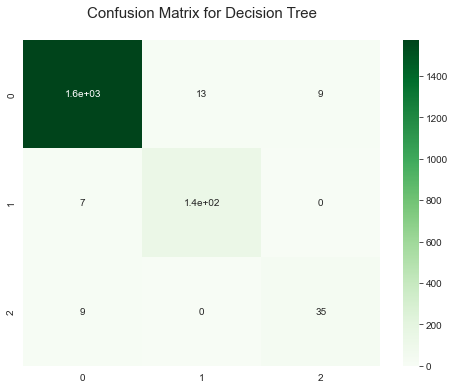

In [29]:
# Confusion matrix of Decision Tree
dt_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(dt_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Decision Tree",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Model: Random Forest</h1>
<hr>

In [30]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print('\033[92mAccuracy: {:.2f}'.format(rf_acc))

# '\033[92m' uses for green colour

Accuracy: 0.98


Text(0.5, 1.05, 'Confusion Matrix for Random Forest')

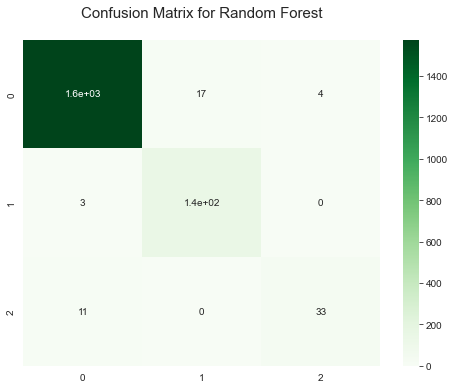

In [31]:
# Confusion matrix of Random Forest
rf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Random Forest",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Model: KNN</h1>
<hr>

In [32]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

y_pred_KC = KNN.predict(X_test)

KCAcc = accuracy_score(y_pred_KC, y_test)
print('\033[92m KNN Accuracy: {:.2f} %'.format(KCAcc*100))

# '\033[92m' uses for green colour

 KNN Accuracy: 95.35 %


Text(0.5, 1.05, 'Confusion Matrix for KNN')

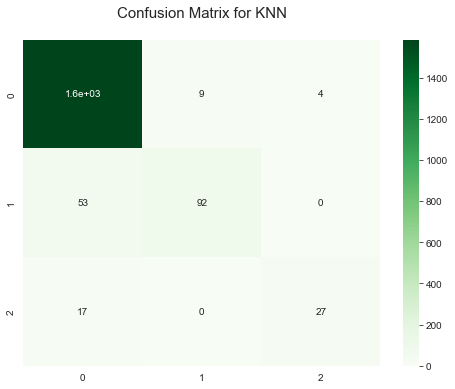

In [33]:
# Confusion matrix of KNN
knn_matrix = confusion_matrix(y_test, y_pred_KC)
plt.figure(figsize=(8,6))
sns.heatmap(knn_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for KNN",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #239b56; text-align: center; line-height: 1.25;">Model: XG Boost</h1>
<hr>

In [34]:
#XGB

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, 
            y_train,
            verbose=0,
            eval_set=[(X_train, y_train), (X_test, y_test)])

y_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print('\033[92mAccuracy: {:.2f}'.format(xgb_acc))

# '\033[92m' uses for green colour

Accuracy: 0.98


Text(0.5, 1.05, 'Confusion Matrix for XGB')

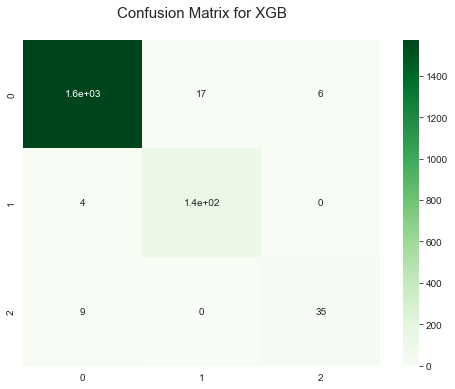

In [35]:
# Confusion matrix of XGB
xgb_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for XGB",fontsize=15,y=1.05)

In [36]:
# XGB using hyperparameter tuning, 
xgb_clf2 = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1,
                            subsample=1,
                            colsample_bytree=1,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf2.fit(X_train, 
            y_train,
            verbose=0,
            eval_set=[(X_train, y_train), (X_test, y_test)])

y_pred = xgb_clf2.predict(X_test)
xgbh_hyp_acc = accuracy_score(y_test, y_pred)
print('\033[92mAccuracy: {:.2f}'.format(xgbh_hyp_acc))

# '\033[92m' uses for green colour

Accuracy: 0.98


Text(0.5, 1.05, 'Confusion Matrix for XGB with Hyperparameter Tuning')

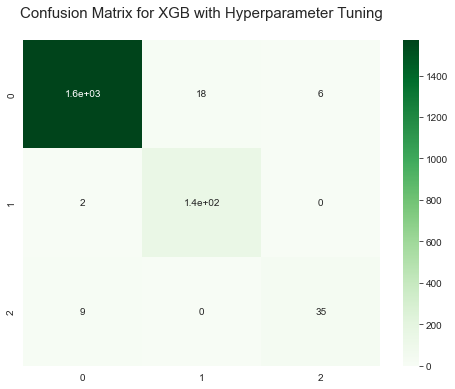

In [37]:
# Confusion matrix of XGB with Hyperparameter Tuning
xgbhyp_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(xgbhyp_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for XGB with Hyperparameter Tuning",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Comparison among Model's Accuracy</h1>
<hr>

In [38]:
compareModel = pd.DataFrame({'Model': ['KNN', 'Decision Tree', 'Random Forest', 
                                       'XGB', 'XGB with Hyperparameter'], 
                             'Accuracy': [KCAcc*100, dec_acc*100, rf_acc*100, xgb_acc*100, xgbh_hyp_acc*100]})

compareModel.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens').hide_index()

Model,Accuracy
Random Forest,98.040314
XGB with Hyperparameter,98.040314
XGB,97.984323
Decision Tree,97.872340
KNN,95.352744


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">Conclusions</h1>
<hr>

## <div style="font-family: Trebuchet MS; background-color: #196F3D; color: #FFFFFF; padding: 12px; line-height: 1.5; text-align: center;">We used <b style="color: #F4D03F">Logistic Regression</b>, <b style="color: #F4D03F">Decision Tree</b>, <b style="color: #F4D03F">Random Forest</b> and <b style="color: #F4D03F">XGB</b>. We got accuracy score of individual ML Algorithms. Then we have done comparison among accuracy scores of those algorithms. Now, we may conclude that, <b style="color: #F4D03F">XGB with Hyperparameter and Random Forest have closely highest accuracy score (~98%)</b>. <b style="color: #F4D03F">So, we can use either XGB Algorithm with Hyperparameter Tuning or Random Forest for Hypo-thyroid Disease Prediction.</b></div>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #239b56; text-align: center; line-height: 1.25;">THANK YOU</h1>
<hr>